Import Load dataset via pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

pd.options.mode.copy_on_write = True

data = pd.read_csv("data/Advertising.csv",index_col=0)
data.head(3)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


Separate sales from dataset

In [2]:
sales = data.Sales.values
data = data.drop(['Sales'], axis = 1)

Split dataset into training and testing before applying standardization to avoid unintended bias

In [3]:
data_train, data_test, sales_train, sales_test = train_test_split(data, sales, test_size=0.25, random_state = 200)

Standardizing columns

In [4]:
data_train = preprocessing.scale(data_train)
data_test = preprocessing.scale(data_test)
sales_train = preprocessing.scale(sales_train)
sales_test = preprocessing.scale(sales_test)

Add a column of 1 to both datasets

In [5]:
data_train = np.c_[np.ones(len(data_train)), data_train]
data_test = np.c_[np.ones(len(data_test)), data_test]

Written functions for gradient descent

Initialize weights

In [6]:
def initialize_weights(randomize = False):
    if randomize:
        return np.random.rand(4)
    else:
        return np.zero(4)

Predict values based on weights

In [7]:
def predict(weights, predictors):
    return np.dot(weights,predictors.T)

Calculate cost function

In [8]:
def compute_cost(predicted, actual):
    errors = np.subtract(predicted, actual)
    sqrd_err = errors ** 2
    mse = np.sum(sqrd_err) / (2 * len(actual))
    return mse

Compute gradient using the partial derivatives of each predictor

In [9]:
def compute_gradient(data, predicted, actual):
    error = np.subtract(predicted, actual)
    gradient = (np.dot(error,data)) / len(data)
    return gradient

Update weights based on the learning rate

In [10]:
def update_weights(weights, gradient, learning_rate):
    return weights - (learning_rate * gradient)

Place all previous functions into the gradient descent function

In [11]:
def grad_descent(data_train, result_train, alpha = 0.1, iterations = 50, d_test=None, s_test=None):
    weights = initialize_weights(randomize=True)
    cost_values = []
    costs = []
    for _ in range(iterations):
        predicted = predict(weights, data_train)
        cost_values.append(compute_cost(predicted, result_train))
        if s_test.size != 0:
            costs.append(compute_cost(predict(weights, d_test),s_test))
        gradient = compute_gradient(data_train, predicted, result_train)
        weights = update_weights(weights, gradient, alpha)
    return weights, cost_values, costs

Create a function to show the cost over iteration

In [12]:
def plot_costs(cost_values, costs):
    plt.plot(cost_values, '-o')
    plt.plot(costs, '-o')
    plt.show
    # x = np.arange(len(sales_train))
    # plt.scatter(x,sales_train)
    # plt.show

Final train cost:  0.043226367431031275
Final test cost:  0.07341269745802824
Train Score: 90.53225129485395
Test Score: 82.78164303881546


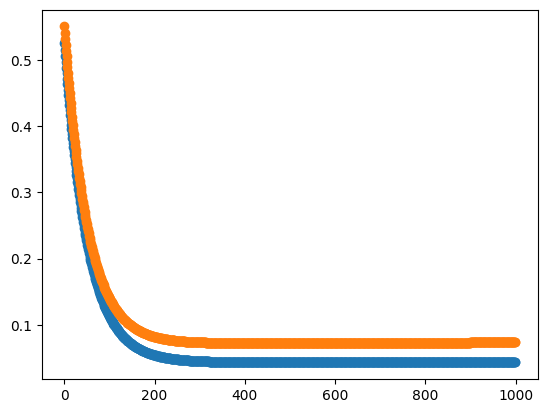

In [31]:
weights, cost_values, costs = grad_descent(
    np.copy(data_train), 
    np.copy(sales_train), 
    alpha = 0.01, 
    iterations = 1000, 
    d_test = np.copy(data_test), 
    s_test = np.copy(sales_test)
)

plot_costs(cost_values, costs)

test = predict(weights, data_test)
print("Final train cost: ", cost_values[-1])
print("Final test cost: ", compute_cost(test, sales_test))

# Test for accuracy using R^2
accuracy = r2_score(predict(weights, data_train), sales_train)
print("Train Score: " + str(accuracy*100))

accuracy = r2_score(test, sales_test)
print("Test Score: " + str(accuracy*100))